In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [33]:
data = pd.read_csv("questions.csv")

In [34]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [35]:
data.describe()

,id,qid1,qid2,is_duplicate
count,404351.000000,404351.000000,404351.000000,404351.000000
mean,202175.000000,391840.987691,390195.973765,0.369248
std,116726.223686,228430.857607,228803.645742,0.482602
min,0.000000,1.000000,2.000000,0.000000
25%,101087.500000,193381.000000,191012.000000,0.000000
50%,202175.000000,390630.000000,388364.000000,0.000000
75%,303262.500000,589514.000000,588071.000000,1.000000
max,404350.000000,789800.000000,789801.000000,1.000000


In [36]:
data.isnull().sum()
df=data

In [37]:
df.shape

(404351, 6)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404351 entries, 0 to 404350
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404351 non-null  int64 
 1   qid1          404351 non-null  int64 
 2   qid2          404351 non-null  int64 
 3   question1     404350 non-null  object
 4   question2     404349 non-null  object
 5   is_duplicate  404351 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [39]:
df['is_duplicate'].value_counts()

is_duplicate
0    255045
1    149306
Name: count, dtype: int64

In [40]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# df['is_duplicate'].value_counts().plot(kind='bar')
# #sns.countplot(x=df['is_duplicate'])

In [41]:
# #Repeated questions
# #add the qids of the both question columns
# import numpy as np
# qid = pd.Series(df['qid1'].tolist()+(df['qid2'].tolist()))

# print("Number of unique questions",np.unique(qid).shape[0])
# x = qid.value_counts()>1
# print("Number of questions getting repeated",x[x].shape[0])

In [42]:
# #repeated questions histogram
# plt.hist(qid.value_counts().values,bins=160)
# plt.yscale('log')
# plt.xlabel('Number of repetitions')
# plt.ylabel('Number of questions')
# plt.title('Histogram of Repeated Questions')
# plt.show()
# #one time occuring questions in x axis near to 0 is 10^6 questions (including the questions from qid1 and qid2) 

In [43]:
new_df = df.sample(90000,random_state=2)#work with only 30000 data
new_df.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       1
is_duplicate    0
dtype: int64

In [44]:
import seaborn as sns
import re
from bs4 import BeautifulSoup

In [45]:
#preprocess before advanced feature engineering
def preprocess(q):
    q = str(q).lower().strip()
    #replace the special characters with their equivalents
    q = q.replace('%' ,'percent')
    q = q.replace('$' ,'dollar')
    q = q.replace('₹' ,'rupee')
    q = q.replace('€' ,'euro')
    q = q.replace('@' ,'at')
    #The pattern '[math]' appears around 900 times in the whole dataset.
    q = q.replace('[math]' ,'')
    #replacing the numbers with string equivalents
    q = q.replace(',000,000,000' ,'b')
    q = q.replace(',000,000' ,'m')
    q = q.replace(',000' ,'k')
    q = re.sub(r'([0-9]+)000000000' ,r'\1b',q)
    q = re.sub(r'([0-9]+)000000' ,r'\1m',q)
    q = re.sub(r'([0-9]+)000' ,r'\1k',q)
    #https://stackoverflow.com/questions/19790188/expanding-english-language-contractions-in-python/19794953#19794953
    contractions = { 
"ain't": "am not / are not / is not / has not / have not",
"aren't": "are not / am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had / he would",
"he'd've": "he would have",
"he'll": "he shall / he will",
"he'll've": "he shall have / he will have",
"he's": "he has / he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has / how is / how does",
"I'd": "I had / I would",
"I'd've": "I would have",
"I'll": "I shall / I will",
"I'll've": "I shall have / I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had / it would",
"it'd've": "it would have",
"it'll": "it shall / it will",
"it'll've": "it shall have / it will have",
"it's": "it has / it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had / she would",
"she'd've": "she would have",
"she'll": "she shall / she will",
"she'll've": "she shall have / she will have",
"she's": "she has / she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as / so is",
"that'd": "that would / that had",
"that'd've": "that would have",
"that's": "that has / that is",
"there'd": "there had / there would",
"there'd've": "there would have",
"there's": "there has / there is",
"they'd": "they had / they would",
"they'd've": "they would have",
"they'll": "they shall / they will",
"they'll've": "they shall have / they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had / we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall / what will",
"what'll've": "what shall have / what will have",
"what're": "what are",
"what's": "what has / what is",
"what've": "what have",
"when's": "when has / when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has / where is",
"where've": "where have",
"who'll": "who shall / who will",
"who'll've": "who shall have / who will have",
"who's": "who has / who is",
"who've": "who have",
"why's": "why has / why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had / you would",
"you'd've": "you would have",
"you'll": "you shall / you will",
"you'll've": "you shall have / you will have",
"you're": "you are",
"you've": "you have"
}
    q_decontracted = []
    for word in q.split():
        if word in contractions:
            word = contractions[word]
        q_decontracted.append(word)

    q = ' '.join(q_decontracted)
    q = q.replace("'ve","have")
    q = q.replace("n't","not")
    q = q.replace("'ll","will")
    #removing html tags
    q = BeautifulSoup(q)
    q = q.get_text()
    #remove punctuations
    pattern = re.compile(r'[^\w\s]')  # Matches everything except word characters and spaces
    q = re.sub(pattern, '', q)
 
    return q

In [46]:
preprocess("I've already! wasn't <b>done</b>")

'ihave already was not done'

In [47]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

/var/folders/hz/ljttb8jn1_76tktqc42tnpzm0000gn/T/ipykernel_2616/629688160.py:150: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  q = BeautifulSoup(q)


In [48]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what has what is it like to work at pivotal labs,0


In [49]:
#feature engineering
#Length of the sentence in each columns
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [50]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,105,104
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what has what is it like to work at pivotal labs,0,53,49


In [51]:
#Number of words in each row
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [52]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,105,104,24,24
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what has what is it like to work at pivotal labs,0,53,49,11,12


In [53]:
#get the common words
def common_words(row):
    w1 = set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    w2 = set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return len(w1&w2)

In [54]:
set(map(lambda word:word.lower().strip(),'I am poor but i would like to invest'.split(" ")))#set function remove the duplicates.

{'am', 'but', 'i', 'invest', 'like', 'poor', 'to', 'would'}

In [55]:
new_df['word_common'] = new_df.apply(common_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,6
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22,3
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,105,104,24,24,19
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what has what is it like to work at pivotal labs,0,53,49,11,12,6


In [56]:
#total words in row
def total_words(row):
    v1 = set(map(lambda word:word.lower().strip(),row['question1'].split(" ")))
    v2 = set(map(lambda word:word.lower().strip(),row['question2'].split(" ")))
    return len(v1) + len(v2)

In [57]:
new_df['word_total'] = new_df.apply(total_words,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,6,19
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22,3,32
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,105,104,24,24,19,40
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6,18
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what has what is it like to work at pivotal labs,0,53,49,11,12,6,22


In [58]:
#word share
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,6,19,0.32
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22,3,32,0.09
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,105,104,24,24,19,40,0.48
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,6,18,0.33
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what has what is it like to work at pivotal labs,0,53,49,11,12,6,22,0.27


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Minimum characters 0
Maximum characters 437
Average num of characters 58


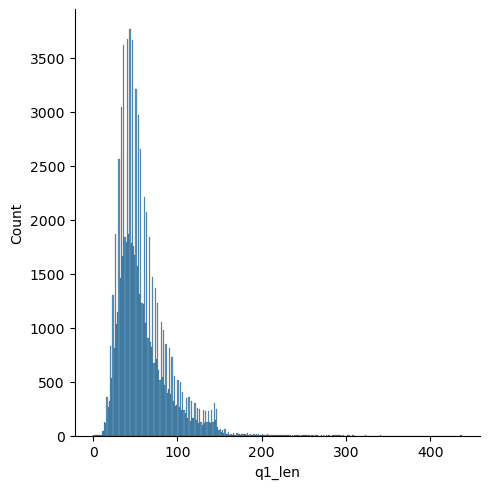

In [59]:
#analysis of features 
sns.displot(new_df['q1_len'])
print("Minimum characters",new_df['q1_len'].min())
print("Maximum characters",new_df['q1_len'].max())
print("Average num of characters",int(new_df['q1_len'].mean()))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Minimum characters 0
Maximum characters 1158
Average num of characters 58


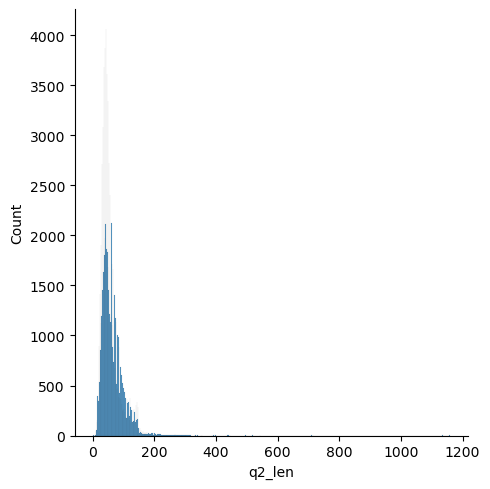

In [60]:
sns.displot(new_df['q2_len'])
print("Minimum characters",new_df['q2_len'].min())
print("Maximum characters",new_df['q2_len'].max())
print("Average num of characters",int(new_df['q2_len'].mean()))

Minimum characters 1
Maximum characters 84
Average num of characters 11


/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


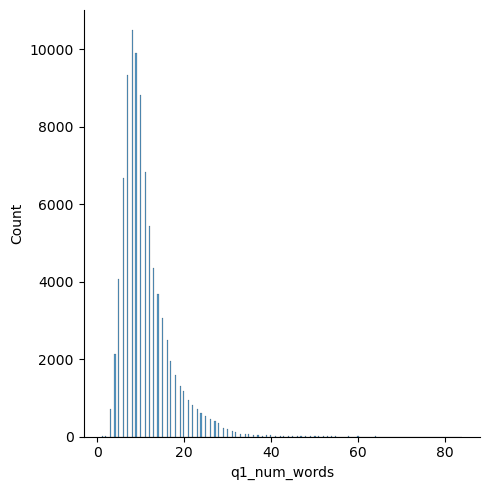

In [61]:
sns.displot(new_df['q1_num_words'])
print("Minimum characters",new_df['q1_num_words'].min())
print("Maximum characters",new_df['q1_num_words'].max())
print("Average num of characters",int(new_df['q1_num_words'].mean()))

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Minimum characters 1
Maximum characters 252
Average num of characters 11


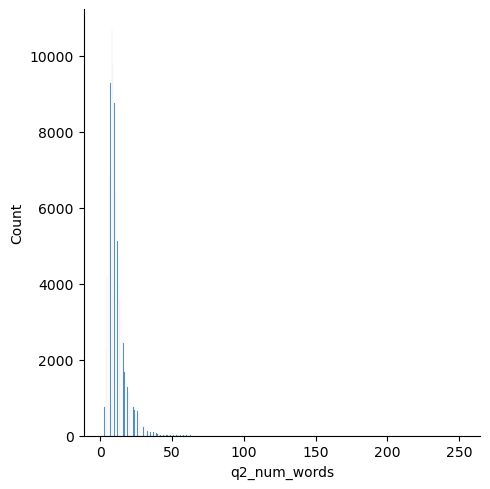

In [62]:
sns.displot(new_df['q2_num_words'])
print("Minimum characters",new_df['q2_num_words'].min())
print("Maximum characters",new_df['q2_num_words'].max())
print("Average num of characters",int(new_df['q2_num_words'].mean()))

/var/folders/hz/ljttb8jn1_76tktqc42tnpzm0000gn/T/ipykernel_2616/3998256111.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/hz/ljttb8jn1_76tktqc42tnpzm0000gn/T/ipykernel_2616/3998256111.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please ad

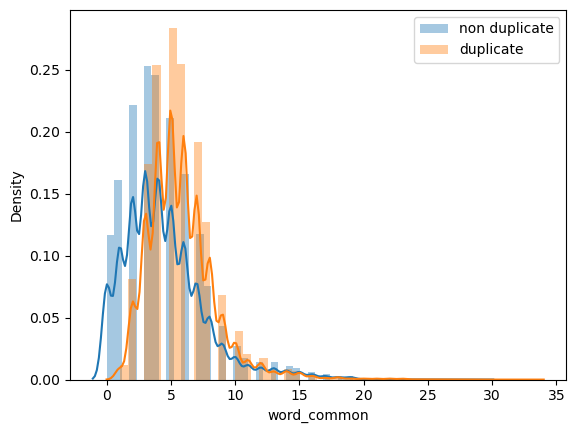

In [63]:
#common words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_common'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_common'],label='duplicate')
plt.legend()
plt.show()

/var/folders/hz/ljttb8jn1_76tktqc42tnpzm0000gn/T/ipykernel_2616/3878293330.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/hz/ljttb8jn1_76tktqc42tnpzm0000gn/T/ipykernel_2616/3878293330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please ada

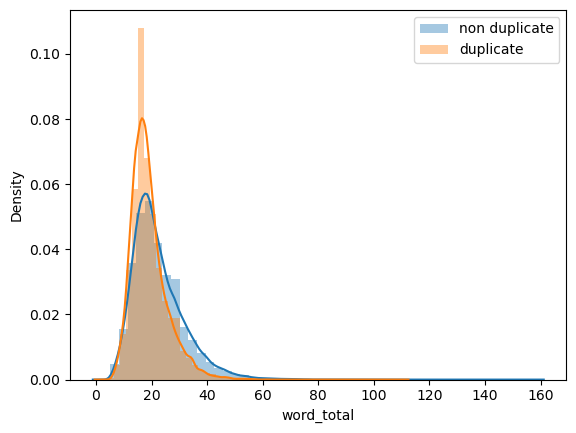

In [64]:
#total words
sns.distplot(new_df[new_df['is_duplicate']==0]['word_total'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_total'],label='duplicate')
plt.legend()
plt.show()

/var/folders/hz/ljttb8jn1_76tktqc42tnpzm0000gn/T/ipykernel_2616/372608964.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/var/folders/hz/ljttb8jn1_76tktqc42tnpzm0000gn/T/ipykernel_2616/372608964.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt

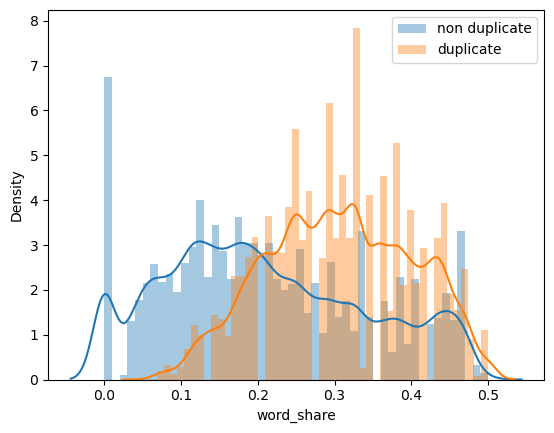

In [65]:
sns.distplot(new_df[new_df['is_duplicate']==0]['word_share'],label='non duplicate')
sns.distplot(new_df[new_df['is_duplicate']==1]['word_share'],label='duplicate')
plt.legend()
plt.show()

In [66]:
#advanced feature engineering
from nltk.corpus import stopwords
def fetch_token_features(row):
    q1 = row['question1']
    q2 = row['question2']
    SAFE_DIV = 0.0001
    STOP_WORDS = stopwords.words('english')
    token_features = [0.0]*8 #list which has 8 columns(features) initially
    #converting the sentence into tokens:
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    if len(q1_tokens)==0 or len(q2_tokens)==0:
        return token_features
    #Get the non-stopwords in questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    #Get the stopwords in questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    #get the common non-stopwords from questionpairs
    common_word_count = len(q1_words.intersection(q2_words))
    #get the common stopwords from questionpairs
    common_stop_count = len(q1_stops.intersection(q2_stops))
    #get the common tokens from question pairs
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))

    token_features[0] = common_word_count / (min(len(q1_words) ,len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words) ,len(q2_words))+ SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_words) ,len(q2_words)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_words) ,len(q2_words)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_words) ,len(q2_words)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_words) ,len(q2_words)) + SAFE_DIV)
    #last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    #first word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    return token_features

In [67]:
import warnings
warnings.filterwarnings("ignore")
token_features = new_df.apply(fetch_token_features,axis=1)
new_df["cwc_min"]    = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]    = list(map(lambda x: x[1], token_features))
new_df["csc_min"]    = list(map(lambda x: x[2], token_features))
new_df["csc_max"]    = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]    = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]    = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]    = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"]    = list(map(lambda x: x[7], token_features))

In [68]:
new_df['ctc_min'].isnull().sum()

0

In [69]:
import distance  # Ensure you have the 'distance' library installed or use another approach for LCS

def fetch_length_features(row):
    q1 = row['question1']
    q2 = row['question2']
   
    # List which stores 3 length-based features initially filled with 0
    length_features = [0.0] * 3  
    
    # Converting the sentence into tokens
    q1_tokens = q1.split()
    q2_tokens = q2.split()

    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features

    # Absolute length difference
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    # Average token length of both questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens)) / 2
   
   #Average token length of the both questions
    strs = list(distance.lcsubstrings(q1,q2))
    length_features[2] = len(strs[0]) / (min(len(q1) , len(q2)) +1)
    return length_features

# Apply the function to each row
length_features = new_df.apply(fetch_length_features, axis=1)

# Extract the features into separate columns
new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))


In [70]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,cwc_max,csc_min,csc_max,ctc_min,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,...,0.666656,0.399992,0.333328,1.199976,0.999983,0.0,1.0,3.0,9.5,0.309524
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22,...,0.000000,0.599988,0.299997,0.599988,0.299997,0.0,0.0,11.0,16.5,0.115385
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,105,104,24,24,...,0.928565,0.357140,0.357140,1.285705,1.285705,1.0,1.0,0.0,20.0,0.695238
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,0.599988,0.749981,0.599988,1.499963,1.199976,0.0,1.0,2.0,9.0,0.355556
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what has what is it like to work at pivotal labs,0,53,49,11,12,...,0.599988,0.749981,0.599988,1.499963,1.199976,0.0,1.0,0.0,11.0,0.320000


In [71]:
#fuzzy based features
from fuzzywuzzy import fuzz
def fetch_fuzzy_features(row):
    q1 = row['question1']
    q2 = row['question2']
   
   
    fuzzy_features = [0.0] * 4  
    #fuzzy ratio
    fuzzy_features[0] = fuzz.QRatio(q1,q2)
    #fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1,q2)
    #toke_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1,q2)
    #token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1,q2)
    return fuzzy_features

In [72]:
fuzzy_features = new_df.apply(fetch_fuzzy_features,axis=1)
#reating new features columns for fuzzy features
new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], length_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))


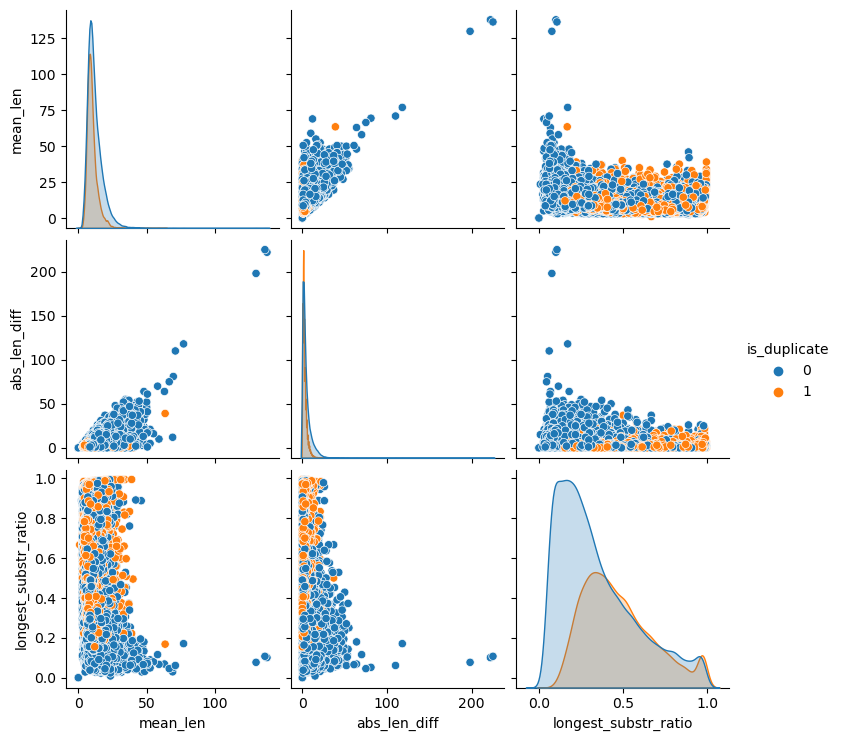

In [73]:
#analysis of advanced feature engineering
sns.pairplot(new_df[['mean_len','abs_len_diff','longest_substr_ratio','is_duplicate']],hue='is_duplicate')#here the blue and yellow curve are overlapping so not that useful.if it doesnot overlap then its useful.

In [74]:
# #using TSNE for dimensionality reduction for 15 features(generated after cleaning the data) to 3 dimensions
# from sklearn.preprocessing import MinMaxScaler
# x=MinMaxScaler().fit_transform(new_df[['cwc_min','cwc_max','csc_min','csc_max','ctc_min','ctc_max','first_word_eq','last_word_eq','mean_len','abs_len_diff','longest_substr_ratio','fuzz_ratio','fuzz_partial_ratio','token_sort_ratio','token_set_ratio']])

In [75]:
# from sklearn.manifold import TSNE
# tsne2d=TSNE(
#     n_components = 2,
#     init ='random',
#     random_state = 101,
#     method ='barnes_hut',
#     n_iter=1000,
#     verbose =2,
#     angle=0.5).fit_transform(x)

In [76]:
y=new_df['is_duplicate'].values

In [77]:
# # Plotting with colors based on the label
# plt.figure(figsize=(8, 6))

# # Blue points for label 0 and red points for label 1
# plt.scatter(tsne2d[y == 0, 0], tsne2d[y == 0, 1], c='red', s=10, label='Label 0')
# plt.scatter(tsne2d[y == 1, 0], tsne2d[y == 1, 1], c='blue', s=10, label='Label 1')

# plt.title('2D t-SNE Visualization with Blue and Red Points')
# plt.xlabel('t-SNE Component 1')
# plt.ylabel('t-SNE Component 2')
# plt.legend(loc='best')
# plt.grid(True)
# plt.show()

In [78]:
# from sklearn.manifold import TSNE
# tsne3d=TSNE(
#     n_components = 3,
#     init ='random',
#     random_state = 101,
#     method ='barnes_hut',
#     n_iter=1000,
#     verbose =2,
#     angle=0.5).fit_transform(x)
# import plotly.graph_objs as go
# import plotly.tools as tls
# import plotly.offline as py
# py.init_notebook_mode(connected=True)

# trace1 = go.Scatter3d(
#     x=tsne3d[:,0],
#     y=tsne3d[:,1],
#     z=tsne3d[:,2],
#     mode='markers',
#     marker=dict(
#         sizemode='diameter',
#         color = y,
#         colorscale = 'Portland',
#         colorbar = dict(title = 'duplicate'),
#         line=dict(color='rgb(255, 255, 255)'),
#         opacity=0.75
#     )
# )

# data=[trace1]
# layout=dict(height=800, width=800, title='3d embedding with engineered features')
# fig=dict(data=data, layout=layout)
# # py.iplot(fig, filename='3DBubble')

In [79]:
ques_df = new_df[['question1','question2']]
ques_df.head()

,question1,question2
339499,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry
289521,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...
4665,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...
54203,why did quora mark my question as incomplete,why does quora detect my question as an incomp...
132566,what is it like working with pivotal labs as a...,what has what is it like to work at pivotal labs


In [80]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
339499,339499,665522,665523,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry,1,57,41,11,8,...,0.999983,0.0,1.0,3.0,9.5,0.309524,39,46,0.309524,85
289521,289521,568878,568879,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...,0,51,103,11,22,...,0.299997,0.0,0.0,11.0,16.5,0.115385,26,50,0.115385,37
4665,4665,9325,9326,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...,0,105,104,24,24,...,1.285705,1.0,1.0,0.0,20.0,0.695238,100,99,0.695238,99
54203,54203,107861,107862,why did quora mark my question as incomplete,why does quora detect my question as an incomp...,1,44,59,8,10,...,1.199976,0.0,1.0,2.0,9.0,0.355556,74,75,0.355556,89
132566,132566,262554,91499,what is it like working with pivotal labs as a...,what has what is it like to work at pivotal labs,0,53,49,11,12,...,1.199976,0.0,1.0,0.0,11.0,0.320000,69,71,0.320000,83
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377277,377277,737995,30876,what is the best meal you ever had,what and where was the best meal ever made and...,0,34,54,8,11,...,0.999980,0.0,1.0,3.0,9.5,0.457143,64,76,0.457143,81
356327,356327,697839,697840,i have been wishing to have white girlfriend f...,what does it mean if ihave been biting my nail...,0,146,115,27,25,...,0.538457,0.0,0.0,2.0,26.0,0.163793,45,46,0.163793,49
205167,205167,404784,404785,what has what is emotive distance,whats emotive distance,1,34,22,7,3,...,0.666644,1.0,0.0,3.0,4.5,0.782609,79,91,0.782609,84
164632,164632,325447,325448,how should you deal with social anxiety,how do i deal with my social anxiety,1,39,36,7,8,...,1.666611,1.0,1.0,1.0,7.5,0.405405,83,83,0.405405,88


In [81]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])
print(final_df.shape)
final_df.head()

(90000, 23)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,ctc_max,last_word_eq,first_word_eq,abs_len_diff,mean_len,longest_substr_ratio,fuzz_ratio,fuzz_partial_ratio,token_sort_ratio,token_set_ratio
339499,1,57,41,11,8,6,19,0.32,0.799984,0.666656,...,0.999983,0.0,1.0,3.0,9.5,0.309524,39,46,0.309524,85
289521,0,51,103,11,22,3,32,0.09,0.000000,0.000000,...,0.299997,0.0,0.0,11.0,16.5,0.115385,26,50,0.115385,37
4665,0,105,104,24,24,19,40,0.48,0.928565,0.928565,...,1.285705,1.0,1.0,0.0,20.0,0.695238,100,99,0.695238,99
54203,1,44,59,8,10,6,18,0.33,0.749981,0.599988,...,1.199976,0.0,1.0,2.0,9.0,0.355556,74,75,0.355556,89
132566,0,53,49,11,12,6,22,0.27,0.749981,0.599988,...,1.199976,0.0,1.0,0.0,11.0,0.320000,69,71,0.320000,83


In [82]:
# from sklearn.feature_extraction.text import CountVectorizer
# questions=list(ques_df['question1'])+list(ques_df['question2'])
# cv = CountVectorizer(max_features=3000)
# q1_arr,q2_arr = np.vsplit(cv.fit_transform(questions).toarray(),2)#spilt into 30,000 for q1 and 30,000 for q2

In [83]:
from gensim.models import Word2Vec
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import numpy as np


In [84]:
ques_df.head()

,question1,question2
339499,why was cyrus mistry removed as the chairman o...,why did the tata sons sacked cyrus mistry
289521,by what age would you think a man should be ma...,when my wrist is extended i feel a shock and b...
4665,how would an arbitrageur seek to capitalize gi...,how would an arbitrageur seek to capitalize gi...
54203,why did quora mark my question as incomplete,why does quora detect my question as an incomp...
132566,what is it like working with pivotal labs as a...,what has what is it like to work at pivotal labs


In [85]:
# Assuming 'processed_questions' contains preprocessed text
X = ques_df[['question1', 'question2']]

# Tokenize the sentences
tokenized_sentences_q1 = X['question1'].apply(lambda x: str(x).split())
tokenized_sentences_q2 = X['question2'].apply(lambda x: str(x).split())

# Train Word2Vec model
word2vec_model_q1 = Word2Vec(sentences=tokenized_sentences_q1, vector_size=100, window=5, min_count=1,sg=1,workers=4)
word2vec_model_q2 = Word2Vec(sentences=tokenized_sentences_q2, vector_size=100, window=5, min_count=1,sg=1, workers=4)


In [86]:
# Function to get the vector representation of a sentence
def get_sentence_vector(sentence, model):
    vector = np.zeros(model.vector_size)
    count = 0
    for word in sentence:
        if word in model.wv:
            vector += model.wv[word]
            count += 1
    if count != 0:
        vector /= count
    return vector

# Create feature vectors for each question
X_q1 = np.array([get_sentence_vector(sentence, word2vec_model_q1) for sentence in tokenized_sentences_q1])
X_q2 = np.array([get_sentence_vector(sentence, word2vec_model_q2) for sentence in tokenized_sentences_q2])


In [87]:
X_q1

array([[-0.22007589, -0.15728292,  0.16290263, ...,  0.09009407,
        -0.1006698 , -0.13946025],
       [ 0.09675061,  0.33293596,  0.06609791, ...,  0.08988398,
         0.0325473 , -0.20980323],
       [-0.06873997,  0.18427519,  0.08361848, ..., -0.17260187,
         0.06700371, -0.03811299],
       ...,
       [ 0.11166462,  0.0970922 , -0.07835481, ..., -0.19738286,
         0.05055972, -0.17570483],
       [-0.15223833,  0.34044025, -0.08268339, ..., -0.28292345,
         0.02977093, -0.05108981],
       [ 0.20085164,  0.21662288,  0.00406788, ..., -0.24159753,
        -0.02267866, -0.10412862]])

In [88]:
y=new_df.iloc[:,5:6]

In [89]:
y

,is_duplicate
339499,1
289521,0
4665,0
54203,1
132566,0
...,...
377277,0
356327,0
205167,1
164632,1


In [90]:
# Concatenate the feature vectors
X_combined = np.concatenate((X_q1, X_q2), axis=1)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_combined, y, test_size=0.2, random_state=42)

# Random Forest without tuning
rfc_wo_advan = RandomForestClassifier()
rfc_wo_advan.fit(X_train, y_train)

# Predictions
y_pred = rfc_wo_advan.predict(X_test)

# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.7666666666666667
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83     11205
           1       0.77      0.55      0.64      6795

    accuracy                           0.77     18000
   macro avg       0.77      0.72      0.73     18000
weighted avg       0.77      0.77      0.76     18000



In [91]:

# Convert embeddings to DataFrames
temp_df1 = pd.DataFrame(X_q1.tolist(), index=ques_df.index)
temp_df2 = pd.DataFrame(X_q2.tolist(), index=ques_df.index)

# Concatenate the embeddings horizontally
temp_df = pd.concat([temp_df1, temp_df2], axis=1)

# Concatenate with final_df (assuming final_df already exists)

final_df = pd.concat([final_df, temp_df], axis=1)

# Print the shape and inspect the DataFrame
print(final_df.shape)
final_df.head()

(90000, 223)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,word_total,word_share,cwc_min,cwc_max,...,90,91,92,93,94,95,96,97,98,99
339499,1,57,41,11,8,6,19,0.32,0.799984,0.666656,...,0.039551,0.109635,-0.058016,0.013492,0.060862,0.362848,-0.205286,0.155554,0.113406,0.138208
289521,0,51,103,11,22,3,32,0.09,0.000000,0.000000,...,0.387469,0.195301,0.032828,0.026952,0.555951,0.117223,0.117989,-0.103486,-0.035786,0.013863
4665,0,105,104,24,24,19,40,0.48,0.928565,0.928565,...,0.240880,0.202008,-0.011748,0.103991,0.474616,0.032294,0.132632,-0.154188,0.019069,-0.012286
54203,1,44,59,8,10,6,18,0.33,0.749981,0.599988,...,0.244217,0.423217,0.048471,0.024242,0.452317,0.066284,0.250380,-0.088028,-0.182723,0.107806
132566,0,53,49,11,12,6,22,0.27,0.749981,0.599988,...,0.333581,0.068330,-0.053896,-0.010811,0.635807,0.160391,0.215725,-0.185691,0.006475,-0.013070


In [92]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
339499,-0.220076,-0.157283,0.162903,-0.035048,-0.137391,-0.378175,0.023415,0.334572,-0.127705,-0.278889,...,0.039551,0.109635,-0.058016,0.013492,0.060862,0.362848,-0.205286,0.155554,0.113406,0.138208
289521,0.096751,0.332936,0.066098,-0.039769,0.146030,-0.392678,0.505313,0.634462,-0.102321,-0.414299,...,0.387469,0.195301,0.032828,0.026952,0.555951,0.117223,0.117989,-0.103486,-0.035786,0.013863
4665,-0.068740,0.184275,0.083618,0.026122,0.092767,-0.254029,0.193576,0.401355,-0.105125,-0.276455,...,0.240880,0.202008,-0.011748,0.103991,0.474616,0.032294,0.132632,-0.154188,0.019069,-0.012286
54203,-0.177475,-0.044862,0.170712,0.193161,-0.229188,-0.414441,0.322521,0.484755,-0.182036,-0.282973,...,0.244217,0.423217,0.048471,0.024242,0.452317,0.066284,0.250380,-0.088028,-0.182723,0.107806
132566,-0.068370,0.134085,-0.077677,0.143648,0.194868,-0.104312,0.102641,0.434916,-0.154919,-0.199802,...,0.333581,0.068330,-0.053896,-0.010811,0.635807,0.160391,0.215725,-0.185691,0.006475,-0.013070
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
377277,0.071991,0.201493,0.136905,0.205790,0.055436,-0.412011,0.307771,0.588341,-0.024490,-0.691215,...,0.223073,-0.144886,0.028594,0.046864,0.508429,0.096755,0.112866,0.103863,-0.034861,0.202162
356327,0.096699,0.234559,0.053383,0.113582,0.038133,-0.402357,0.271330,0.506482,-0.293269,-0.464465,...,0.290223,0.250849,-0.053258,0.045287,0.560975,0.109340,0.006121,-0.011849,0.005378,-0.008616
205167,0.111665,0.097092,-0.078355,0.192130,0.026377,-0.197141,0.071519,0.737468,-0.068575,-0.474982,...,0.128392,0.064616,0.303060,-0.091229,0.693577,0.377431,0.096949,0.008215,-0.274405,-0.019878
164632,-0.152238,0.340440,-0.082683,0.333500,0.196824,-0.381671,0.513203,0.507295,-0.319487,-0.246965,...,0.421220,0.140356,0.013633,-0.096366,0.878608,0.156505,0.043599,0.006163,-0.043469,0.099982


In [93]:
# temp_df1 = pd.DataFrame(q1_arr,index=ques_df.index)
# temp_df2 = pd.DataFrame(q2_arr,index=ques_df.index)
# temp_df = pd.concat([temp_df1,temp_df2],axis=1)

In [94]:
# final_df = pd.concat([final_df,temp_df],axis=1)
# print(final_df.shape)
# final_df.head(9)

In [95]:
x=final_df.iloc[:,1:].values
y=final_df.iloc[:,0].values

In [96]:
y

array([1, 0, 0, ..., 1, 1, 0])

In [97]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

In [98]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)

In [99]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
accuracy_rfc=accuracy_score(y_test,rfc_pred)
precision_rfc=precision_score(y_test,rfc_pred)
recall_rfc=recall_score(y_test,rfc_pred)
f1_score =f1_score(y_test,rfc_pred)
confusion_matrix_rfc=confusion_matrix(y_test,rfc_pred)
print("Random forest classifier")
print("Accuracy:",accuracy_rfc)
print("Precision:",precision_rfc)
print("Recall:",recall_rfc)
print("F1 score:",f1_score)
print("Confusion Matrix:\n",confusion_matrix_rfc)

Random forest classifier
Accuracy: 0.8087777777777778
Precision: 0.743749029352384
Recall: 0.727700957301322
F1 score: 0.735637480798771
Confusion Matrix:
 [[9769 1650]
 [1792 4789]]


In [100]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
xgb_pred = xgb.predict(x_test)

In [101]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
accuracy_xgb=accuracy_score(y_test,xgb_pred)
precision_xgb=precision_score(y_test,xgb_pred)
recall_xgb=recall_score(y_test,xgb_pred)
f1_score =f1_score(y_test,xgb_pred)
confusion_matrix_xgb=confusion_matrix(y_test,xgb_pred)
print("Random forest classifier")
print("Accuracy:",accuracy_xgb)
print("Precision:",precision_xgb)
print("Recall:",recall_xgb)
print("F1 score:",f1_score)
print("Confusion Matrix:\n",confusion_matrix_xgb)

Random forest classifier
Accuracy: 0.8055
Precision: 0.7366318377381684
Recall: 0.7284607202552803
F1 score: 0.7325234930093972
Confusion Matrix:
 [[9705 1714]
 [1787 4794]]


In [102]:
# from sklearn import svm
# SVM=svm.SVC(kernel='rbf')
# SVM.fit(x_train,y_train)
# svm_pred = SVM.predict(x_test)

In [103]:
# from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,f1_score
# accuracy_svm=accuracy_score(y_test,svm_pred)
# precision_svm=precision_score(y_test,svm_pred)
# recall_svm=recall_score(y_test,svm_pred)
# f1_score =f1_score(y_test,svm_pred)
# confusion_matrix_svm=confusion_matrix(y_test,svm_pred)
# print("Random forest classifier")
# print("Accuracy:",accuracy_svm)
# print("Precision:",precision_svm)
# print("Recall:",recall_svm)
# print("F1 score:",f1_score)
# print("Confusion Matrix:\n",confusion_matrix_svm)

In [104]:
# #for predicting on individual sentences
# def test_common_words(q1,q2):
#     w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
#     w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
#     return len(w1 & w2)






In [105]:
# def test_total_words(q1,q2):
#     w1 = set(map(lambda word: word.lower().strip(), q1.split(" ")))
#     w2 = set(map(lambda word: word.lower().strip(), q2.split(" ")))    
#     return (len(w1) + len(w2))


In [106]:

# def test_fetch_token_features(q1,q2):
    
#     SAFE_DIV = 0.0001 

#     STOP_WORDS = stopwords.words("english")
    
#     token_features = [0.0]*8
    
#     # Converting the Sentence into Tokens: 
#     q1_tokens = q1.split()
#     q2_tokens = q2.split()
    
#     if len(q1_tokens) == 0 or len(q2_tokens) == 0:
#         return token_features

#     # Get the non-stopwords in Questions
#     q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
#     q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
#     #Get the stopwords in Questions
#     q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
#     q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
#     # Get the common non-stopwords from Question pair
#     common_word_count = len(q1_words.intersection(q2_words))
    
#     # Get the common stopwords from Question pair
#     common_stop_count = len(q1_stops.intersection(q2_stops))
    
#     # Get the common Tokens from Question pair
#     common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
#     token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
#     token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
#     token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
#     token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
#     token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
#     token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
#     # Last word of both question is same or not
#     token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
#     # First word of both question is same or not
#     token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
#     return token_features

In [107]:
# def test_fetch_length_features(q1,q2):
    
#     length_features = [0.0]*3
    
#     # Converting the Sentence into Tokens: 
#     q1_tokens = q1.split()
#     q2_tokens = q2.split()
    
#     if len(q1_tokens) == 0 or len(q2_tokens) == 0:
#         return length_features
    
#     # Absolute length features
#     length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
#     #Average Token Length of both Questions
#     length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
#     strs = list(distance.lcsubstrings(q1, q2))
#     length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
#     return length_features

In [108]:
# def test_fetch_fuzzy_features(q1,q2):
    
#     fuzzy_features = [0.0]*4
    
#     # fuzz_ratio
#     fuzzy_features[0] = fuzz.QRatio(q1, q2)

#     # fuzz_partial_ratio
#     fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

#     # token_sort_ratio
#     fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

#     # token_set_ratio
#     fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

#     return fuzzy_features


In [109]:
# def query_point_creator(q1,q2):
#     input_query = []
#     #preprocess
#     q1 = preprocess(q1)
#     q2 = preprocess(q2)
#     #fetch the basic features
#     input_query.append(len(q1))
#     input_query.append(len(q2))

#     input_query.append(len(q1.split(" ")))
#     input_query.append(len(q2.split(" ")))

#     input_query.append(test_common_words(q1,q2))
#     input_query.append(test_total_words(q1,q2))
#     input_query.append(round(test_common_words(q1,q2)/test_total_words(q1,q2),2))#word share

#     #fetch token features
#     token_features = test_fetch_token_features(q1,q2)
#     input_query.extend(token_features)

#     #fetch length based features
#     length_features = test_fetch_length_features(q1,q2)
#     input_query.extend(length_features)

#     #fetch fuzzy features
#     fuzzy_features = test_fetch_fuzzy_features(q1,q2)
#     input_query.extend(fuzzy_features)

#     #bag of words for q1
#     q1_bow = cv.transform([q1]).toarray()

#     #bag of words for q2
#     q2_bow = cv.transform([q2]).toarray()
#     return np.hstack((np.array(input_query).reshape(1,22),q1_bow,q2_bow))

In [110]:
# q1 = 'what is the current capital of india?'
# q2 = 'where is the india s capital'
# rfc.predict(query_point_creator(q1,q2))

In [111]:
# import pickle
# pickle.dump(rfc,open('quora_rfc_model.pkl','wb'))
# pickle.dump(rfc,open('cv.pkl','wb'))

In [112]:
# #cross validation
# from sklearn.model_selection import cross_val_score, KFold
# num_folds = 5
# kf = KFold(n_splits=num_folds, shuffle=True, random_state=42)
# cross_val_results = cross_val_score(xgb,x_train, y_train, cv=kf)

In [115]:
# Define the number of folds for Stratified K-Fold ( target is imbalanced)
from sklearn.model_selection import cross_val_score, StratifiedKFold
num_folds = 5
skf = StratifiedKFold(n_splits=num_folds, shuffle=True, random_state=42)

# Perform cross-validation
cross_val_results = cross_val_score(xgb, x_train, y_train, cv=skf)


In [116]:
print(f'Cross-Validation Results (Accuracy): {cross_val_results}')
print(f'Mean Accuracy: {cross_val_results.mean()}')

Cross-Validation Results (Accuracy): [0.80347222 0.80347222 0.80506944 0.80298611 0.81125   ]
Mean Accuracy: 0.80525


In [ ]:
import pickle
pickle.dump(rfc,open('quora_rfc_model_improved.pkl','wb'))
pickle.dump(rfc,open('word2vec.pkl','wb'))